In [1]:
!pip install d2l==1.0.3


In [2]:
import torch
from torch import nn
from d2l import torch as d2l

In [3]:
def dropout_layer(X, dropout):
    assert 0 <= dropout <= 1
    if dropout == 1: return torch.zeros_like(X)
    mask = (torch.rand(X.shape) > dropout).float()
    return mask * X / (1.0 - dropout)

In [4]:
X = torch.arange(16, dtype = torch.float32).reshape((2, 8))
print('dropout_p = 0:', dropout_layer(X, 0))
print('dropout_p = 0.5:', dropout_layer(X, 0.5))
print('dropout_p = 1:', dropout_layer(X, 1))

dropout_p = 0: tensor([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11., 12., 13., 14., 15.]])
dropout_p = 0.5: tensor([[ 0.,  0.,  0.,  0.,  8., 10., 12.,  0.],
        [16., 18.,  0.,  0.,  0.,  0.,  0., 30.]])
dropout_p = 1: tensor([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]])


In [5]:
class DropoutMLPScratch(d2l.Classifier):
    def __init__(self, num_outputs, num_hiddens_1, num_hiddens_2,
                 dropout_1, dropout_2, lr):
        super().__init__()
        self.save_hyperparameters()
        self.lin1 = nn.LazyLinear(num_hiddens_1)
        self.lin2 = nn.LazyLinear(num_hiddens_2)
        self.lin3 = nn.LazyLinear(num_outputs)
        self.relu = nn.ReLU()

    def forward(self, X):
        H1 = self.relu(self.lin1(X.reshape((X.shape[0], -1))))
        if self.training:
            H1 = dropout_layer(H1, self.dropout_1)
        H2 = self.relu(self.lin2(H1))
        if self.training:
            H2 = dropout_layer(H2, self.dropout_2)
        return self.lin3(H2)

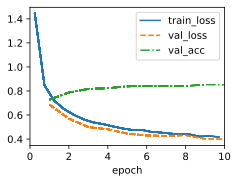

In [6]:
hparams = {'num_outputs':10, 'num_hiddens_1':256, 'num_hiddens_2':256,
           'dropout_1':0.5, 'dropout_2':0.5, 'lr':0.1}
model = DropoutMLPScratch(**hparams)
data = d2l.FashionMNIST(batch_size=256)
trainer = d2l.Trainer(max_epochs=10)
trainer.fit(model, data)

In [7]:
class DropoutMLP(d2l.Classifier):
    def __init__(self, num_outputs, num_hiddens_1, num_hiddens_2,
                 dropout_1, dropout_2, lr):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.Flatten(), nn.LazyLinear(num_hiddens_1), nn.ReLU(),
            nn.Dropout(dropout_1), nn.LazyLinear(num_hiddens_2), nn.ReLU(),
            nn.Dropout(dropout_2), nn.LazyLinear(num_outputs))

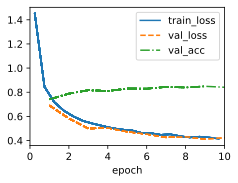

In [8]:
model = DropoutMLP(**hparams)
trainer.fit(model, data)

In [ ]:
# Designing an experiment

# The experiment will train two models. The models will have indentical parameters, but the dropout between each layer will be flipped
# in the models. For the quantitative analysis, we will compare the training and validation performance (e.g., accuracy) for both models.
# We will also check for convergence and stability during training. For Qualitative abalysis, we will observe if one configuration 
# leads to faster convergence or better generalization. We will also inspect the learning curves and dropout effects on the training dynamics.

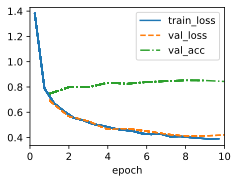

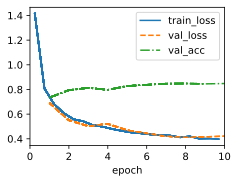

In [9]:
hparams_1 = {'num_outputs': 10, 'num_hiddens_1': 256, 'num_hiddens_2': 256,
             'dropout_1': 0.2, 'dropout_2': 0.5, 'lr': 0.1}

hparams_2 = {'num_outputs': 10, 'num_hiddens_1': 256, 'num_hiddens_2': 256,
             'dropout_1': 0.5, 'dropout_2': 0.2, 'lr': 0.1}

# Create models with different dropout configurations
model_1 = DropoutMLPScratch(**hparams_1)
model_2 = DropoutMLPScratch(**hparams_2)

# Train the models
trainer = d2l.Trainer(max_epochs=10)

print("Training Model with Dropout Configuration 1")
trainer.fit(model_1, data)

print("\nTraining Model with Dropout Configuration 2")
trainer.fit(model_2, data)


In [10]:
# The validation accuracies across each model are very similar, as are the convergence and stability during training.
# Both models converged quickly, and the learning curves were all generally similar from observation. These obervations are in line with 
# literature, that suggest changing the dropout rates across models leads to changes of less than 1% across models with small data sizes